In [4]:
# Testing 
import numpy as np 
import matplotlib.pyplot as plt
import sys,os,time

new k
new k


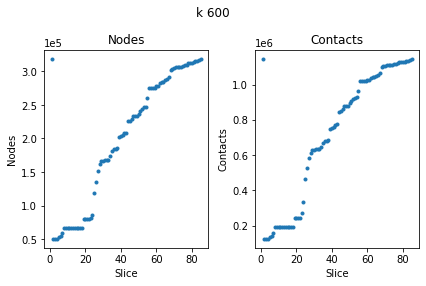

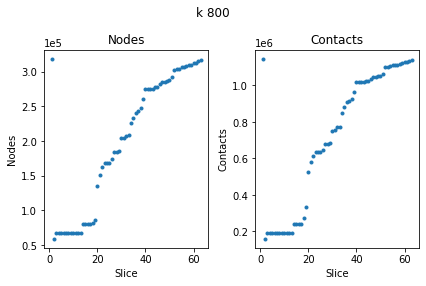

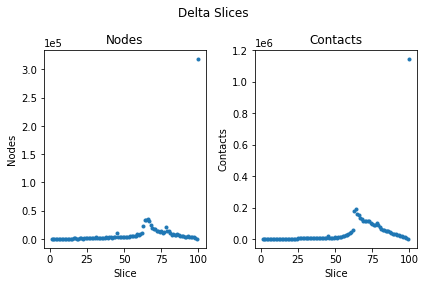

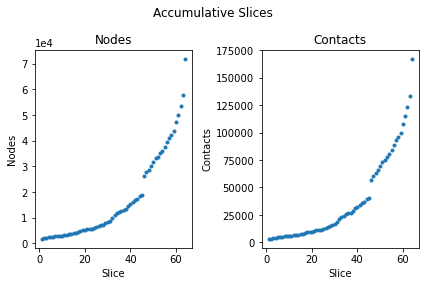

In [9]:
#Plotting lenght of labels and graph files
ks = [600,800]
path_to_res = "./plots_from_notebook/"

path_2_6 = "../../experiment6/experiment_6/"
num_slices = len(os.listdir(path_2_6)) + 1
label_lens = []
graph_lens = []
for i in range(1,num_slices):
    slice = path_2_6 + "/slice_" + str(i)
    labels = slice + "/labels_" + str(i) + ".csv"
    graphs = slice + "/graph_" + str(i) + ".mat"

    with open(labels,"r") as inf:
        label_lens.append(len(inf.readlines()))

    with open(graphs,"r") as inf:
        graph_lens.append(len(inf.readlines()))

label_lens = np.array(label_lens)
graph_lens = np.array(graph_lens)

np.save(path_to_res + "exp6_len_labels.npy",label_lens)
np.save(path_to_res + "exp6_len_graphs.npy",graph_lens)



for k in ks:
    print("new k")

    label_lens = []
    graph_lens = []
    path = "../../experiment12/experiment_12/k_" + str(k) + "/k" + str(k)
    num_slices = len(os.listdir(path)) + 1
    for i in range(1,num_slices):
        slice = path + "/slice_" + str(i)
        labels = slice + "/labels_" + str(i) + ".csv"
        graphs = slice + "/graph_" + str(i) + ".mat"
        
        with open(labels,"r") as inf:
            label_lens.append(len(inf.readlines()))

        with open(graphs,"r") as inf:
            graph_lens.append(len(inf.readlines()))

    label_lens = np.array(label_lens)
    graph_lens = np.array(graph_lens)

    np.save(path_to_res + "k" + str(k) + "_len_labels.npy",label_lens)
    np.save(path_to_res + "k" + str(k) + "_len_graphs.npy",graph_lens)

for k in ks:
    labels_file = path_to_res + "k" + str(k) + "_len_labels.npy"
    graphs_file = path_to_res + "k" + str(k) + "_len_graphs.npy"

    labels = np.load(labels_file)
    graphs = np.load(graphs_file)

    numS = [i+1 for i in range(len(labels))]
    numS = np.array(numS)

    fig, axs = plt.subplots(1, 2)
    fig.suptitle("k " + str(k))
    axs[0].plot(numS, labels, ".")
    axs[0].set_title('Nodes')
    axs[0].set(xlabel = "Slice", ylabel = "Nodes")
    axs[0].ticklabel_format(axis='y', style='scientific',scilimits=(0,0))
    axs[1].plot(numS, graphs, ".")
    axs[1].set_title('Contacts')
    axs[1].set(xlabel = "Slice", ylabel = "Contacts")
    fig.tight_layout(pad=1.0)

    plt.savefig(path_to_res + "k" + str(k)+ "_num_contacts_and_nodes.pdf")
    plt.show()



labels_file = path_to_res +"exp7_len_labels.npy"
graphs_file = path_to_res +"exp7_len_graphs.npy"

labels = np.load(labels_file)
graphs = np.load(graphs_file)

numS = [i+1 for i in range(len(labels))]
numS = np.array(numS)

fig, axs = plt.subplots(1, 2)
fig.suptitle("Delta Slices")
axs[0].plot(numS, labels, ".")
axs[0].set_title('Nodes')
axs[0].set(xlabel = "Slice", ylabel = "Nodes")
axs[0].ticklabel_format(axis='y', style='scientific',scilimits=(0,0))
axs[1].plot(numS, graphs, ".")
axs[1].set_title('Contacts')
axs[1].set(xlabel = "Slice", ylabel = "Contacts")
fig.tight_layout(pad=1.0)

plt.savefig(path_to_res +"exp7_num_contacts_and_nodes.pdf")
plt.show()

labels_file = path_to_res +"exp6_len_labels.npy"
graphs_file = path_to_res +"exp6_len_graphs.npy"

labels = np.load(labels_file)
graphs = np.load(graphs_file)

numS = [i+1 for i in range(len(labels))]
numS = np.array(numS)

fig, axs = plt.subplots(1, 2)
fig.suptitle("Accumulative Slices")
axs[0].plot(numS, labels, ".")
axs[0].set_title('Nodes')
axs[0].set(xlabel = "Slice", ylabel = "Nodes")
axs[0].ticklabel_format(axis='y', style='scientific',scilimits=(0,0))
axs[1].plot(numS, graphs, ".")
axs[1].set_title('Contacts')
axs[1].set(xlabel = "Slice", ylabel = "Contacts")
fig.tight_layout(pad=1.0)

plt.savefig(path_to_res +"exp6_num_contacts_and_nodes.pdf")
plt.show()












In [72]:
N = 10000
mat = np.ones([N,N])

maxN = 3
mat[50,500] = 5
mat[40,400] = 4
mat[30,300] = 3
idxs = []

mat_i = np.argsort(mat.ravel())[::-1]  #flatten and sorted after arguments

t_s = time.perf_counter()
result = [(int(k//mat.shape[1]), int(k%mat.shape[1])) for k in mat_i][:maxN] #unravel indexes, pick out 3 largest
t_e = time.perf_counter()
hjemmesnekk_t = t_e-t_s

t_s = time.perf_counter()
test = np.unravel_index(mat_i, mat.shape)
for i in range(3):
    idxs.append((test[0][i],test[1][i]))
t_e = time.perf_counter()
numpy_t = t_e-t_s

print(f"Hjemmesnekk resulterte i {idxs} på {hjemmesnekk_t:0.4f} s")
print(f"Np.unravel resulterte i {result} på {numpy_t:0.4f} s")


Hjemmesnekk resulterte i [(50, 500), (40, 400), (30, 300)] på 101.5893 s
Np.unravel resulterte i [(50, 500), (40, 400), (30, 300)] på 9.4462 s
